import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import os


In [ ]:
pwd

'C:\\Users\\shola'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
df.shape

(7032, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.drop('customerID', axis=1, inplace=True)


In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')
df['TotalCharges'].dtype

dtype('float64')

In [10]:
df.SeniorCitizen.unique()

array([0, 1])

In [11]:
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [12]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [15]:
df.PhoneService = df.PhoneService.map({'No':0,'Yes':1})
df.PhoneService.unique()

array([0, 1])

In [16]:
#df.MultipleLines.unique()
df.MultipleLines =  df.MultipleLines.map({'No phone service':2,'No':0,'Yes':1})
df.MultipleLines

0       2
1       0
2       0
3       2
4       0
       ..
7027    1
7028    1
7029    2
7030    1
7031    0
Name: MultipleLines, Length: 7032, dtype: int64

In [17]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [18]:
df.OnlineSecurity.unique()
df.OnlineSecurity = df.OnlineSecurity.map({'No':0,'Yes':1,'No internet service':2})
df.OnlineSecurity

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    1
7030    0
7031    1
Name: OnlineSecurity, Length: 7032, dtype: int64

In [19]:
df.StreamingTV.unique()
df.StreamingTV = df.StreamingTV.map({'No':0,'Yes':1})

In [20]:
df.Contract.unique()
df.Contract = df.Contract.map({'Month-to-month':0,'One year':1,'Two year':2})
df.Contract


0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int64

In [21]:
df.Churn = df.Churn.map({'No':0,'Yes':1})

In [22]:
df["Churn"]=df["Churn"].astype(float, errors = 'raise')
df["Churn"]

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 7032, dtype: float64

In [23]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [24]:
df["StreamingMovies"] = df["StreamingMovies"].map({"No":0,"Yes":1,"No internet service":2})
# = df["StreamingMovies"].astype(float, errors = 'raise')

In [25]:
df.PaperlessBilling = df.PaperlessBilling.map({'Yes':1,'No':0})

In [26]:
df['gender'] =df["gender"].map({"Female":0, 'Male':1})
#df.gender

In [27]:
df.InternetService = df.InternetService.map({'DSL':0, 'Fiber optic':1,'No':2})
#df.InternetService

In [28]:
df.OnlineBackup = df.OnlineBackup.map({'No':0,'Yes':1})
df.OnlineBackup
#df.OnlineSecurity = df.OnlineSecurity.map({'No':0,'yes':1,'No internet servicer':2})

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
7027    0.0
7028    1.0
7029    0.0
7030    0.0
7031    0.0
Name: OnlineBackup, Length: 7032, dtype: float64

In [29]:
df.Dependents
df.Dependents = df.Dependents.map({'No':0,'Yes':1})
df.Dependents
#df.Contract

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    0
Name: Dependents, Length: 7032, dtype: int64

In [30]:
df["DeviceProtection"] = df["DeviceProtection"].map({'No':0,'Yes':1,'No internet service':2})

In [31]:
df["TechSupport"] =df["TechSupport"].map({'No':0,'Yes':1})

In [32]:
df.Partner = df.Partner.map({'No':0,'Yes':1})
df.Partner

0       1
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    1
7031    0
Name: Partner, Length: 7032, dtype: int64

In [33]:
#df.PaymentMethod.unique()
df.PaymentMethod = df.PaymentMethod.map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df.PaymentMethod

0       0
1       1
2       1
3       2
4       0
       ..
7027    1
7028    3
7029    0
7030    1
7031    2
Name: PaymentMethod, Length: 7032, dtype: int64

In [34]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,0.000084,-0.002236,-0.004365,-0.013786,0.004526,-0.008291,-0.006400,-0.001339,0.000095,-0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.100120,-0.032160,-0.210546,-0.003253,-0.156700,-0.135289,0.034150,-0.120658,-0.141820,0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.090774,0.000513,0.081078,0.173154,0.093391,0.144021,0.154387,0.075310,0.294094,-0.013957,0.133280,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.017333,0.044030,0.188889,0.096695,0.154819,0.136108,0.052660,0.125086,0.240556,-0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.243214,-0.029835,0.147575,0.423038,0.180895,0.374344,0.328069,0.142143,0.676734,0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.690813,0.387266,0.125544,0.014632,0.138938,-0.040368,0.055687,0.164379,0.003019,0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,0.000084,0.100120,0.090774,-0.017333,0.243214,-0.690813,1.000000,-0.340504,-0.235077,0.095639,-0.200400,0.065993,0.101433,-0.194858,0.078254,0.108261,0.029916,0.146127,0.251357,0.019609
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.340504,1.000000,0.607412,-0.014056,0.662685,-0.211913,0.169519,0.708336,0.099579,-0.138166,0.008851,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.004365,-0.210546,0.081078,0.188889,0.147575,0.125544,-0.235077,0.607412,1.000000,0.179488,0.748684,0.273270,0.043613,0.704672,0.389138,-0.333656,0.214330,-0.620532,-0.153234,-0.332443
OnlineBackup,-0.013786,-0.003253,0.173154,0.096695,0.423038,0.014632,0.095639,-0.014056,0.179488,1.000000,0.185021,0.190381,0.146821,0.137064,0.318317,0.006299,0.165757,0.252683,0.431750,-0.195758


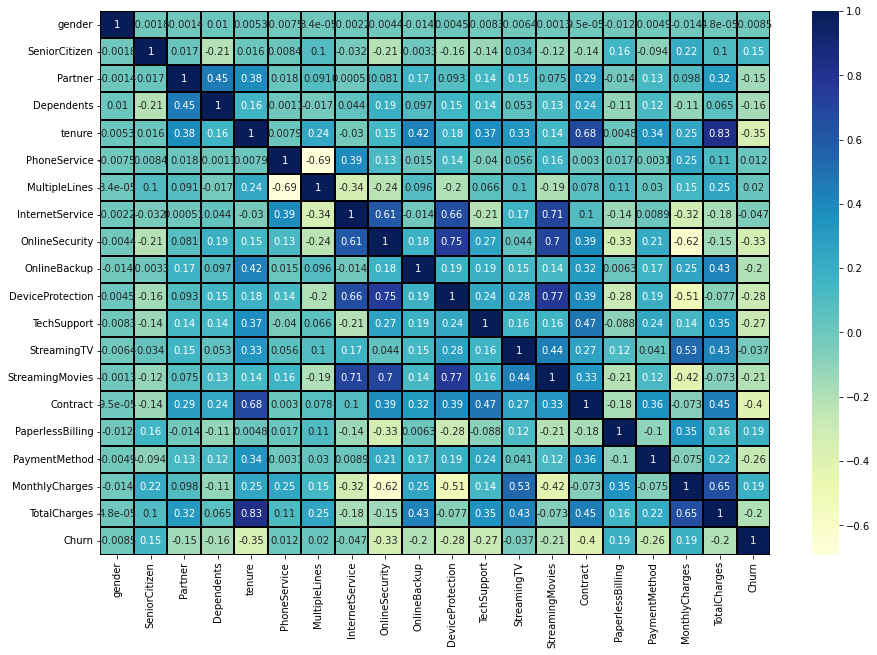

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cbar = True,annot = True, cmap='YlGnBu', linewidths=1, linecolor='black')

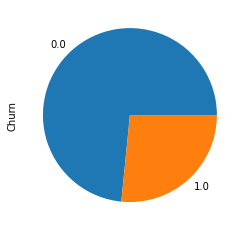

In [36]:
round(df['Churn'].value_counts()/df.shape[0]*100,2).plot.pie()

In [37]:
df.dropna(inplace=True)

In [38]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,0,0,1.0,0,0.0,0.0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0.0,1,0.0,0.0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1.0,0,0.0,0.0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,2,0,1,0.0,1,1.0,0.0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0.0,0,0.0,0.0,0,0,1,0,70.70,151.65


In [39]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 5512, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


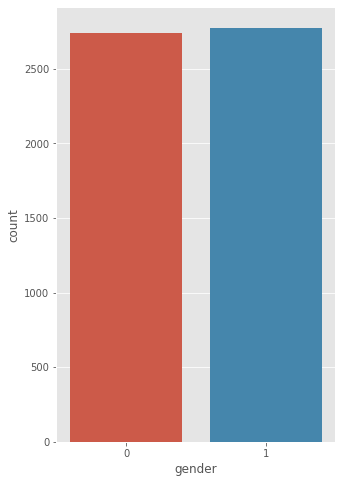

In [40]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(df["gender"], );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


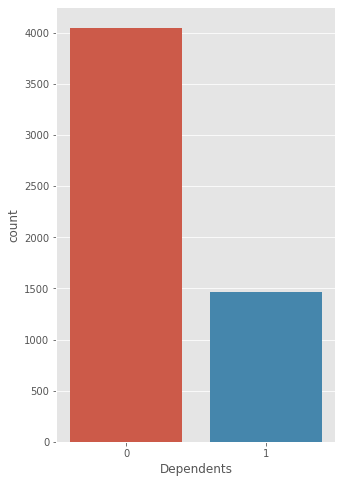

In [41]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(df["Dependents"], );

In [42]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5512 non-null   int64  
 1   SeniorCitizen     5512 non-null   int64  
 2   Partner           5512 non-null   int64  
 3   Dependents        5512 non-null   int64  
 4   tenure            5512 non-null   int64  
 5   PhoneService      5512 non-null   int64  
 6   MultipleLines     5512 non-null   int64  
 7   InternetService   5512 non-null   int64  
 8   OnlineSecurity    5512 non-null   int64  
 9   OnlineBackup      5512 non-null   float64
 10  DeviceProtection  5512 non-null   int64  
 11  TechSupport       5512 non-null   float64
 12  StreamingTV       5512 non-null   float64
 13  StreamingMovies   5512 non-null   int64  
 14  Contract          5512 non-null   int64  
 15  PaperlessBilling  5512 non-null   int64  
 16  PaymentMethod     5512 non-null   int64  


In [45]:
pd.DataFrame(X).isnull().count()

gender              5512
SeniorCitizen       5512
Partner             5512
Dependents          5512
tenure              5512
PhoneService        5512
MultipleLines       5512
InternetService     5512
OnlineSecurity      5512
OnlineBackup        5512
DeviceProtection    5512
TechSupport         5512
StreamingTV         5512
StreamingMovies     5512
Contract            5512
PaperlessBilling    5512
PaymentMethod       5512
MonthlyCharges      5512
TotalCharges        5512
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [49]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (4134, 19), 
y_train shape: (4134,),
X_test shape: (1378, 19),
y_test shape: (1378,)



In [52]:
#EVALUATION OF OUR MODELS
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [50]:
#Training Dataset with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train,y_train)
RandomForestClassifierScore = rf.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 75.03628447024674


In [53]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[798 116]
 [228 236]]
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       914
         1.0       0.67      0.51      0.58       464

    accuracy                           0.75      1378
   macro avg       0.72      0.69      0.70      1378
weighted avg       0.74      0.75      0.74      1378



In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
DecisionTreeClassifierScore = tree.score(X_test, y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 69.01306240928882


In [55]:
tree_pred = tree.predict(X_test)
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[698 216]
 [211 253]]
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77       914
         1.0       0.54      0.55      0.54       464

    accuracy                           0.69      1378
   macro avg       0.65      0.65      0.65      1378
weighted avg       0.69      0.69      0.69      1378

